In [13]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 11.5, 9

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

Data:

In [3]:
df = pd.DataFrame({
    'Normal': np.random.normal(100, 50, 1000),
    'Exponential': np.random.exponential(25, 1000),
    'Uniform': np.random.uniform(-250, -50, 1000)
})

In [4]:
def plot_scaling_result(data, scaled_data, scaling_title, x_lim=(-5, 5)):

  scaled_df = pd.DataFrame(
      scaled_data, 
      columns=['Normal', 'Exponential', 'Uniform']
  )

  fig, (ax1, ax2) = plt.subplots(ncols=2)
  ax1.set_xlim((-300, 300))
  ax1.set_title('No Scaling')
  sns.kdeplot(data.Normal, ax=ax1)
  sns.kdeplot(data.Exponential, ax=ax1)
  sns.kdeplot(data.Uniform, ax=ax1)

  ax2.set_xlim(x_lim)
  ax2.set_title(scaling_title)
  sns.kdeplot(scaled_df.Normal, ax=ax2)
  sns.kdeplot(scaled_df.Exponential, ax=ax2)
  sns.kdeplot(scaled_df.Uniform, ax=ax2);

Min-Max Scaling

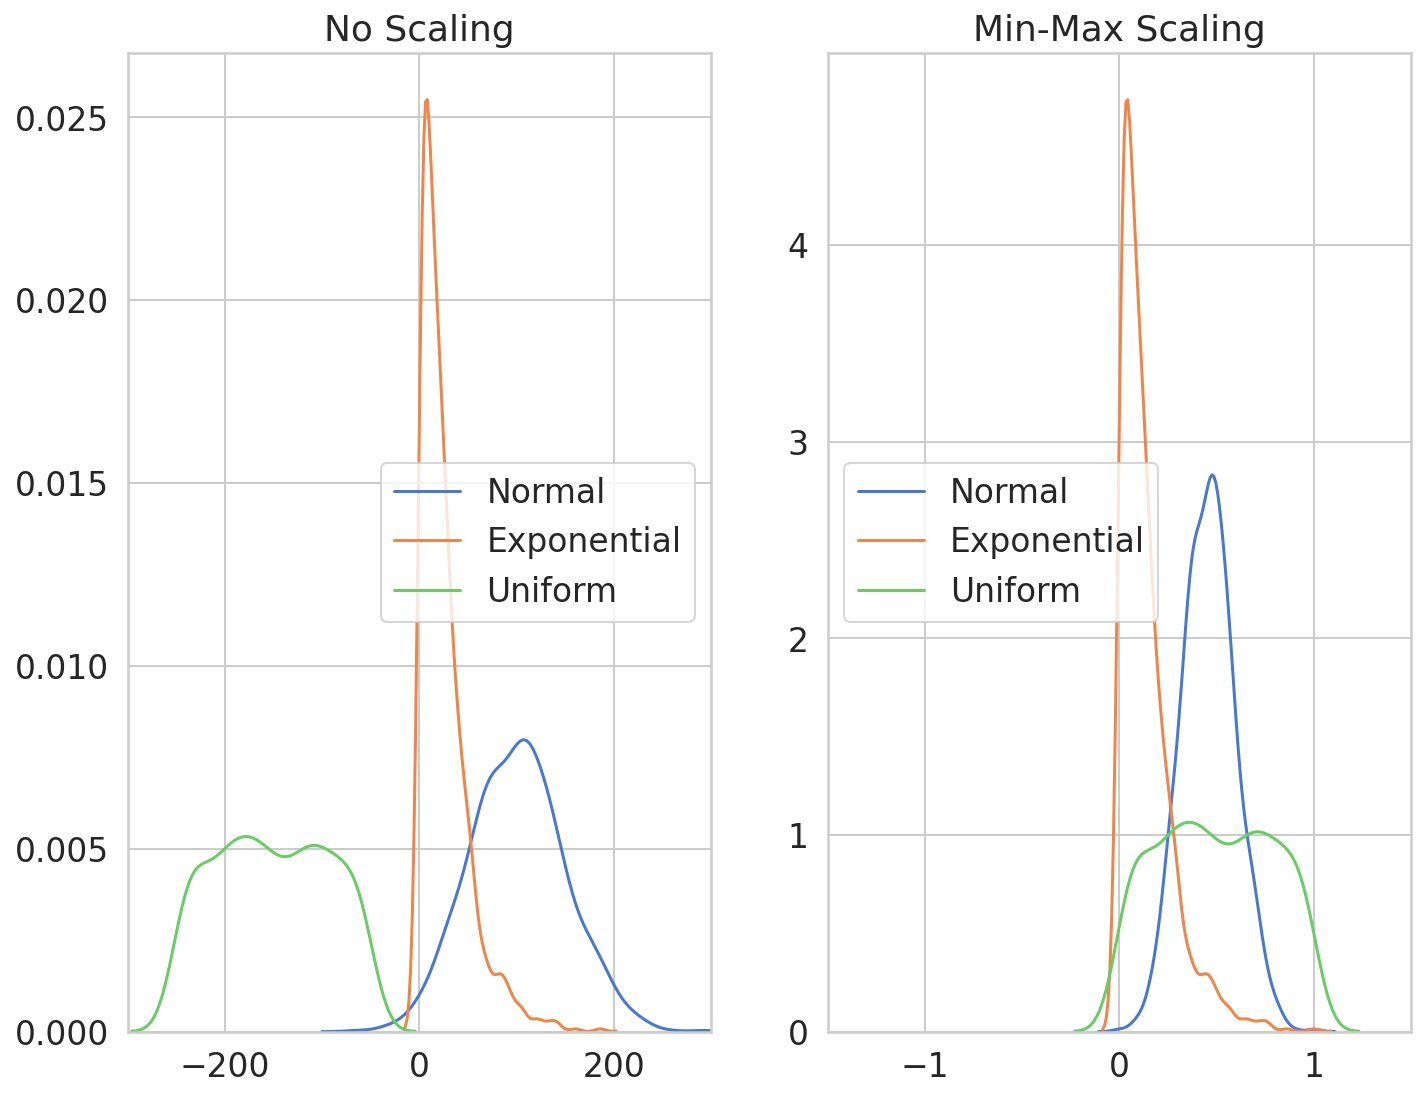

In [14]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaled = MinMaxScaler(feature_range=(0, 1)).fit_transform(df)

plot_scaling_result(df, min_max_scaled, 'Min-Max Scaling', (-1.5, 1.5))

Standardization

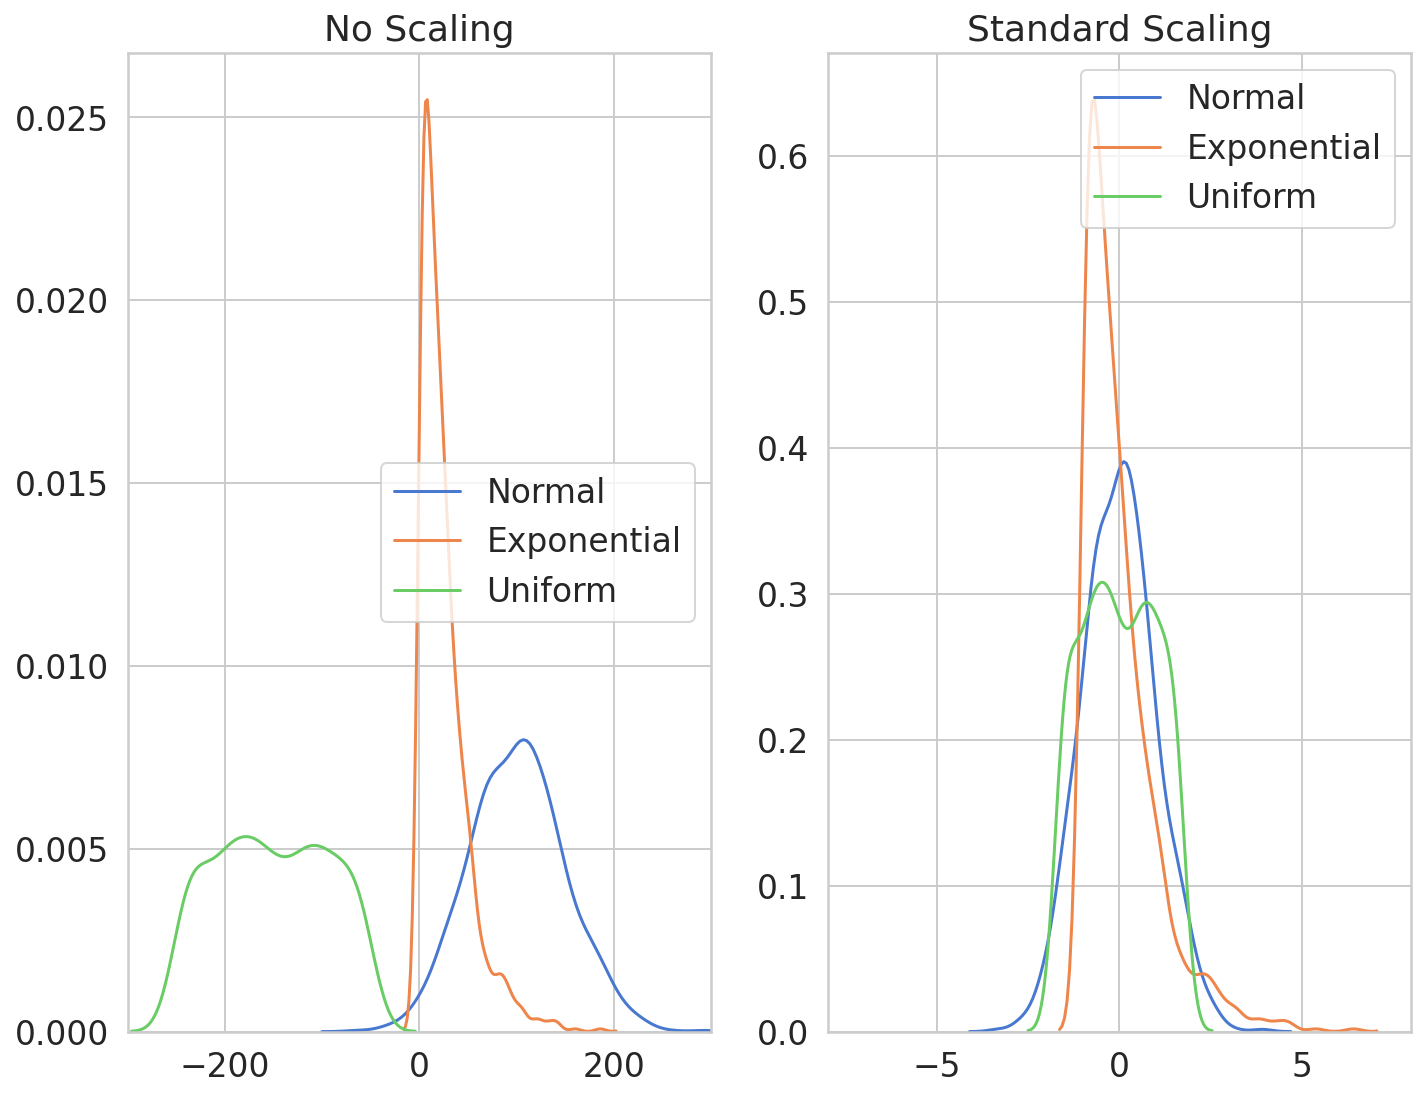

In [15]:
from sklearn.preprocessing import StandardScaler

std_scaled = StandardScaler().fit_transform(df)
plot_scaling_result(df, std_scaled, 'Standard Scaling', (-8, 8))

Robust Scaling

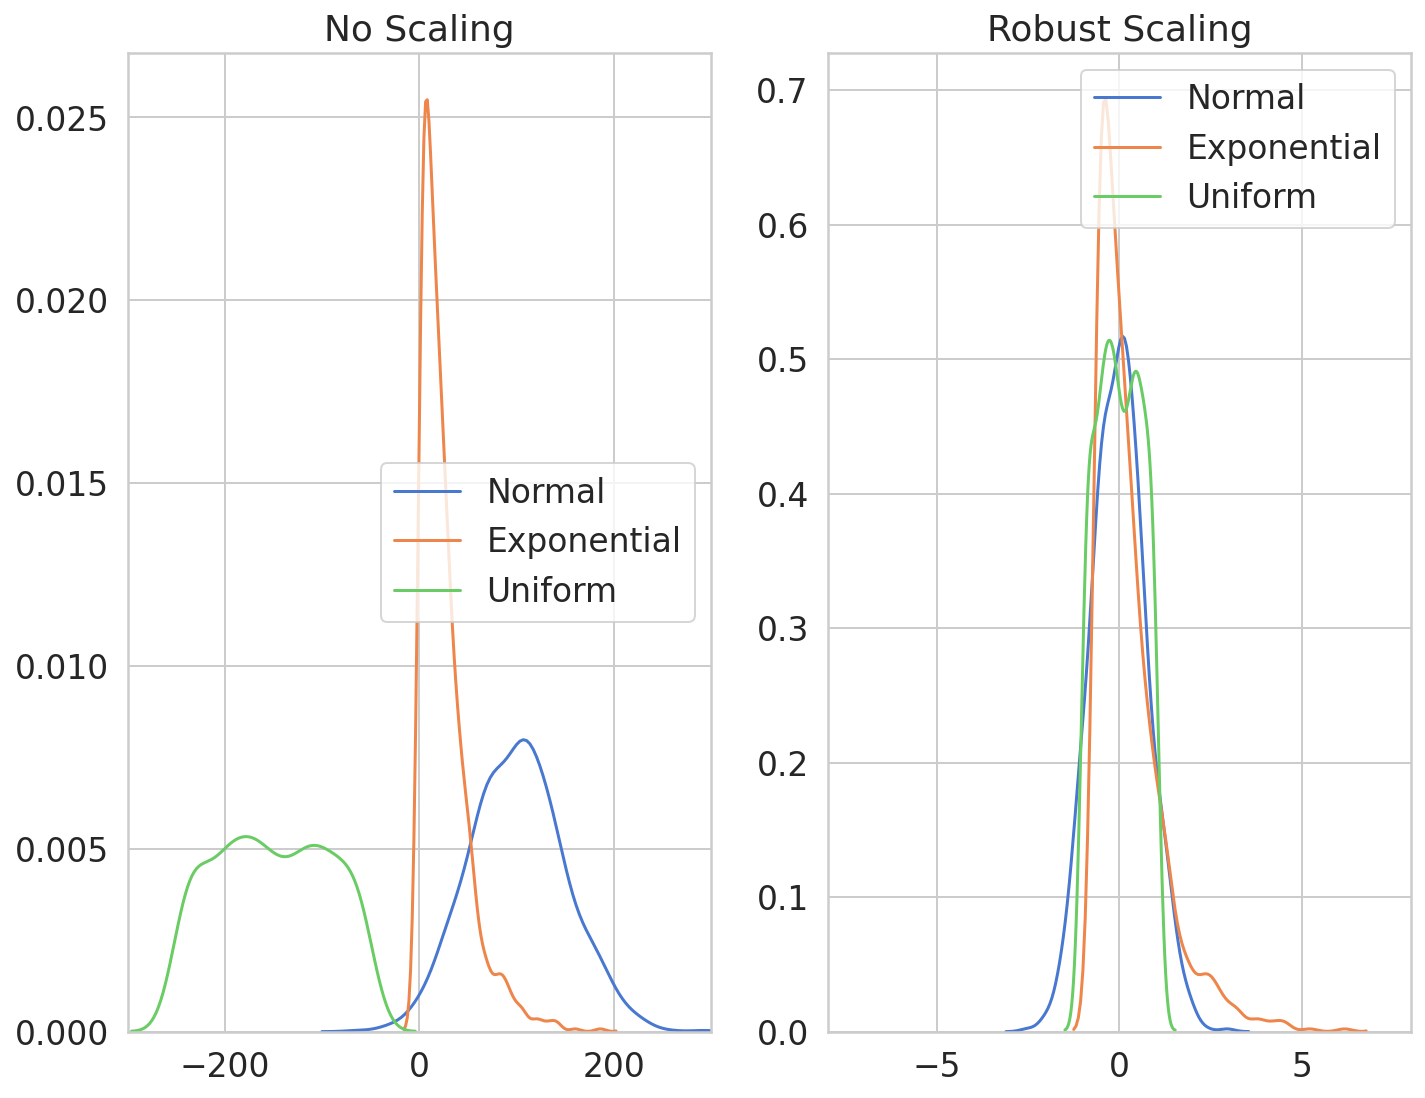

In [16]:
from sklearn.preprocessing import RobustScaler

robust_scaled = RobustScaler().fit_transform(df)
plot_scaling_result(df, robust_scaled, 'Robust Scaling', (-8, 8))